# Комплексный анализ рынка труда для аналитиков на основе данных HH.ru

**📊 Цель проекта:** Провести всестороннее исследование вакансий для четырёх ключевых аналитических специализаций (Data Analyst, Business Analyst, System Analyst, Product Analyst), чтобы выявить:
1. Различия в требованиях, условиях труда и зарплатных ожиданиях.
2. Ключевые навыки (hard и soft) для разных уровней грейдов.
3. Динамику спроса и рыночные тренды.
4. Сформулировать практические рекомендации для соискателей, компаний и HR-специалистов.

**📁 Исходные данные:**
Данные получены через API сайта HH.ru. Датасет содержит информацию о 3786 вакансиях по выбранным специализациям за период с августа по сентябрь 2025 года. Данные отбирались по названиям специальностей в названии вакансии и в названии компании.
- id: Идентификатор вакансии
- name: Наименование вакансии
- published_at: Дата и время публикации вакансии
- alternate_url: Ссылка на вакансию на сайте
- type: Тип вакансии (открытая или закрытая)
- employer: Информация о компании-работодателе (словарь)
- department: Департамент компании
- area: Город, в котором открыта вакансия (словарь)
- experience: Требуемый опыт работы
- key_skills: Список ключевых навыков
- schedule: График работы
- employment: Тип занятости
- description: Описание вакансии
- salary_from: Нижняя граница вилки зарплаты
- salary_to: Верхняя граница вилки зарплаты
- salary_currency: Валюта оплаты (RUR, USD, EUR, KZT, BYR, UZS, KGS)
- salary_bin: Диапазон заработной платы (категория)
- key_skills_from_key_skills_field: Перечень ключевых навыков из поля key_skills
- hard_skills_from_description: Требуемые профессиональные (hard) навыки, извлеченные из описания
- soft_skills_from_description: Список гибких (soft) навыков, извлеченных из описания
- grade: Классификация грейда (Junior, Junior+, Middle, Senior)
- search_query: Специализация аналитика

**📁 Исходные данные:**
Данные получены через API сайта HH.ru. Датасет содержит информацию о 3786 вакансиях по выбранным специализациям.
- id: Идентификатор вакансии
- name: Наименование вакансии
- published_at: Дата и время публикации вакансии
- alternate_url: Ссылка на вакансию на сайте
- type: Тип вакансии (открытая или закрытая)
- employer: Информация о компании-работодателе (словарь)
- department: Департамент компании
- area: Город, в котором открыта вакансия (словарь)
- experience: Требуемый опыт работы
- key_skills: Список ключевых навыков
- schedule: График работы
- employment: Тип занятости
- description: Описание вакансии
- salary_from: Нижняя граница вилки зарплаты
- salary_to: Верхняя граница вилки зарплаты
- salary_currency: Валюта оплаты (RUR, USD, EUR, KZT, BYR, UZS, KGS)
- salary_bin: Диапазон заработной платы (категория)
- key_skills_from_key_skills_field: Перечень ключевых навыков из поля key_skills
- hard_skills_from_description: Требуемые профессиональные (hard) навыки, извлеченные из описания
- soft_skills_from_description: Список гибких (soft) навыков, извлеченных из описания
- grade: Классификация грейда (Junior, Junior+, Middle, Senior)
- search_query: Специализация аналитика

**🗺️ План исследования:**
1. Предобработка данных
    - Обработка пропущенных значений
    - Конвертация валют в рубли
    - Заполнение зарплатных данных на основе медианных значений по грейдам
    - Категоризация зарплатных диапазонов
2. Анализ распределения вакансий
    - Распределение по специализациям
    - Доля грейдов в каждой специализации
3. Зарплатный анализ
    - Медианные зарплаты по специализациям и грейдам
    - Зарплатные вилки
4. Анализ навыков
    - Топ-10 hard skills по специализациям
    - Топ-10 soft skills по специализациям
    - Соотношение hard/soft skills по грейдам
    - Уникальные навыки для каждой специализации
    - Эволюция требований от Junior к Senior
5. Анализ работодателей и условий труда
    - ТОП-10 работодателей по количеству вакансий
    - Распределение по типам занятости
    - Анализ графиков работы
    - Популярные отрасли и департаменты
6. Временной анализ
    - Динамика публикации вакансий по месяцам
    - Сезонность спроса на аналитиков
    - Тренды развития рынка труда
7. Сравнительный анализ специализаций
    - Data Analyst vs Business Analyst
    - System Analyst vs Product Analyst
    - Ключевые различия в требованиях и условиях
8. Формулирование выводов и рекомендаций
    - Для соискателей: карьерные пути и развитие навыков
    - Для компаний: стратегии найма и удержания специалистов
    - Для HR-специалистов: лучшие практики подбора

**🛠️ Технологический стек**
- Python 3.8+
- Pandas - обработка и анализ данных
- NumPy - математические операции
- Matplotlib/Seaborn - визуализация данных
- Jupyter Notebook - интерактивная среда разработки

In [147]:
# 1. Импорт библиотек и загрузка данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datetime import datetime


# Настройка отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Загрузка данных
file_path = r"/project_path"
df = pd.read_csv(file_path, parse_dates=['published_at'], low_memory=False)

print("Размер датасета:", df.shape)
print("\nПервые 3 строки данных:")
display(df.head(3))

Размер датасета: (3786, 22)

Первые 3 строки данных:


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,salary_currency,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,grade,search_query
0,124824461,Аналитик данных (junior),2025-09-03 14:07:07+03:00,https://hh.ru/vacancy/124824461,Открытая,КБ Уральский банк реконструкции и развития (УБ...,NaN,Екатеринбург,Нет опыта,NaN,Полный день,Полная занятость,Если вы мечтаете начать карьеру в аналитике и ...,NaN,90000.0,RUR,50k-100k,NaN,"bi, математика, python, excel, sql",NaN,Junior,Аналитик данных
1,124642904,Младший аналитик данных / Junior Data Analyst,2025-09-01 15:23:41+03:00,https://hh.ru/vacancy/124642904,Открытая,Sape,NaN,Москва,Нет опыта,NaN,Удаленная работа,Полная занятость,Sape — это сервисы для рекламы и продвижения в...,NaN,NaN,NaN,Не указана,NaN,"анализ данных, git, ml, python, sql",организация,Junior,Аналитик данных
2,124800546,Аналитик данных,2025-09-03 09:01:34+03:00,https://hh.ru/vacancy/124800546,Открытая,Мани-Фест,NaN,Москва,Нет опыта,NaN,Удаленная работа,Полная занятость,Ищем аналитика на полный рабочий день в компан...,NaN,NaN,NaN,Не указана,NaN,"vba, python, excel, sql",NaN,Junior,Аналитик данных


In [148]:
# Анализ пропусков перед обработкой
print("ДОЛИ ПРОПУСКОВ ДО ОБРАБОТКИ:")
print("=" * 50)

# Анализ пропусков по основным столбцам
columns_to_check = ['department', 'salary_from', 'salary_to', 'salary_currency', 'salary_bin']
missing_data = {}

for col in columns_to_check:
    if col in df.columns:
        missing_percent = df[col].isna().mean() * 100
        missing_data[col] = missing_percent
        print(f"{col}: {missing_percent:.1f}%")

print("\n" + "=" * 50)

ДОЛИ ПРОПУСКОВ ДО ОБРАБОТКИ:
department: 81.3%
salary_from: 79.3%
salary_to: 85.0%
salary_currency: 75.3%
salary_bin: 0.0%



Видим большое количество пропусков в данных, будем исправлять

РАСПРЕДЕЛЕНИЕ ВАЛЮТ В ЗАРПЛАТНЫХ ДАННЫХ:
salary_currency
RUR    825
KZT     50
BYR     23
USD     21
UZS     10
KGS      4
EUR      2
Name: count, dtype: int64


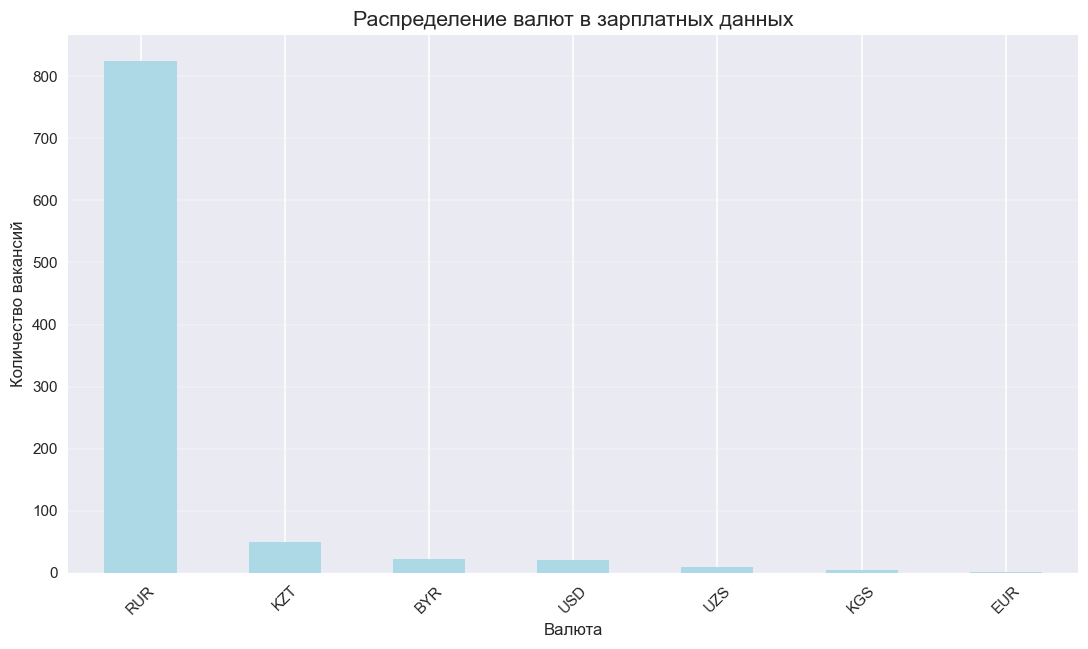

In [149]:
# Анализ валют в зарплатных данных
print("РАСПРЕДЕЛЕНИЕ ВАЛЮТ В ЗАРПЛАТНЫХ ДАННЫХ:")
print("=" * 50)

currency_distribution = df['salary_currency'].value_counts()
print(currency_distribution)

# Визуализация распределения валют
plt.figure(figsize=(10, 6))
currency_distribution.plot(kind='bar', color='lightblue')
plt.title('Распределение валют в зарплатных данных', fontsize=14)
plt.xlabel('Валюта')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Видим, что большая часть зарплаты платится в Российских рублях, но про другие валюты тоже забывать не стоит

In [150]:
# 4. Создание столбца salary_median_rub с конвертацией в рубли
print("СОЗДАНИЕ СТОЛБЦА salary_median_rub:")
print("=" * 50)

# Курсы валют (актуальные на дату анализа)
exchange_rates = {
    'RUR': 1.0,
    'RUB': 1.0,
    'USD': 95.0,    # Замените на актуальный курс
    'EUR': 102.0,   # Замените на актуальный курс
    'KZT': 0.20,    # Замените на актуальный курс
    'BYR': 28.0,    # Замените на актуальный курс
    'UZS': 0.0078,  # Замените на актуальный курс
    'KGS': 1.06,    # Замените на актуальный курс
}

def calculate_median_rub(row):
    if pd.isna(row['salary_currency']) or (pd.isna(row['salary_from']) and pd.isna(row['salary_to'])):
        return np.nan
    
    # Конвертируем в рубли
    rate = exchange_rates.get(row['salary_currency'], 1.0)
    
    salary_from = row['salary_from'] if not pd.isna(row['salary_from']) else row['salary_to'] * 0.8
    salary_to = row['salary_to'] if not pd.isna(row['salary_to']) else row['salary_from'] * 1.2
    
    salary_from_rub = salary_from * rate
    salary_to_rub = salary_to * rate
    
    # Рассчитываем медиану вилки
    return (salary_from_rub + salary_to_rub) / 2

# Создаем столбец с медианной зарплатой в рублях
df['salary_median_rub'] = df.apply(calculate_median_rub, axis=1)

print(f"Создано записей с зарплатой в рублях: {df['salary_median_rub'].notna().sum()}")
print(f"Пропусков в salary_median_rub: {df['salary_median_rub'].isna().sum()}")

СОЗДАНИЕ СТОЛБЦА salary_median_rub:
Создано записей с зарплатой в рублях: 935
Пропусков в salary_median_rub: 2851


In [151]:
# 5. Обработка пропусков в столбце department
print("ОБРАБОТКА СТОЛБЦА DEPARTMENT:")
print("=" * 40)

# Заполняем пропуски в department
df['department'] = df['department'].fillna('Не указано')

# Проверяем результат
print(f"Пропусков после заполнения: {df['department'].isna().sum()}")
print(f"Уникальных значений: {df['department'].nunique()}")
print(f"Топ-5 значений:\n{df['department'].value_counts().head()}")

ОБРАБОТКА СТОЛБЦА DEPARTMENT:
Пропусков после заполнения: 0
Уникальных значений: 183
Топ-5 значений:
department
Не указано                      3079
Сбер для экспертов                53
Т1 Иннотех                        35
ПАО ВТБ, Розничный бизнес         29
МАГНИТ, Розничная сеть. Офис      22
Name: count, dtype: int64


In [152]:
# 6. Анализ зарплатных данных по грейдам
print("АНАЛИЗ ЗАРПЛАТ ПО ГРЕЙДАМ:")
print("=" * 40)

# Создаем копию для анализа (только с указанными зарплатами)
salary_df = df[df['salary_median_rub'].notna()].copy()

# Группируем по грейдам и считаем статистики
salary_stats = salary_df.groupby('grade')['salary_median_rub'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

print("Статистики зарплат по грейдам (только вакансии с указанной зарплатой):")
display(salary_stats)
print(f"\nВсего вакансий с указанной зарплатой: {len(salary_df)}")

АНАЛИЗ ЗАРПЛАТ ПО ГРЕЙДАМ:
Статистики зарплат по грейдам (только вакансии с указанной зарплатой):


,count,mean,median,std,min,max
grade,,,,,,
Junior,116,79362.16,75000.0,31672.11,220.0,225000.0
Junior+,482,125444.07,111950.0,52474.21,13000.0,330000.0
Middle,305,207310.69,200000.0,74200.48,1300.0,570000.0
Senior,32,256617.19,232500.0,105009.50,90000.0,535500.0



Всего вакансий с указанной зарплатой: 935


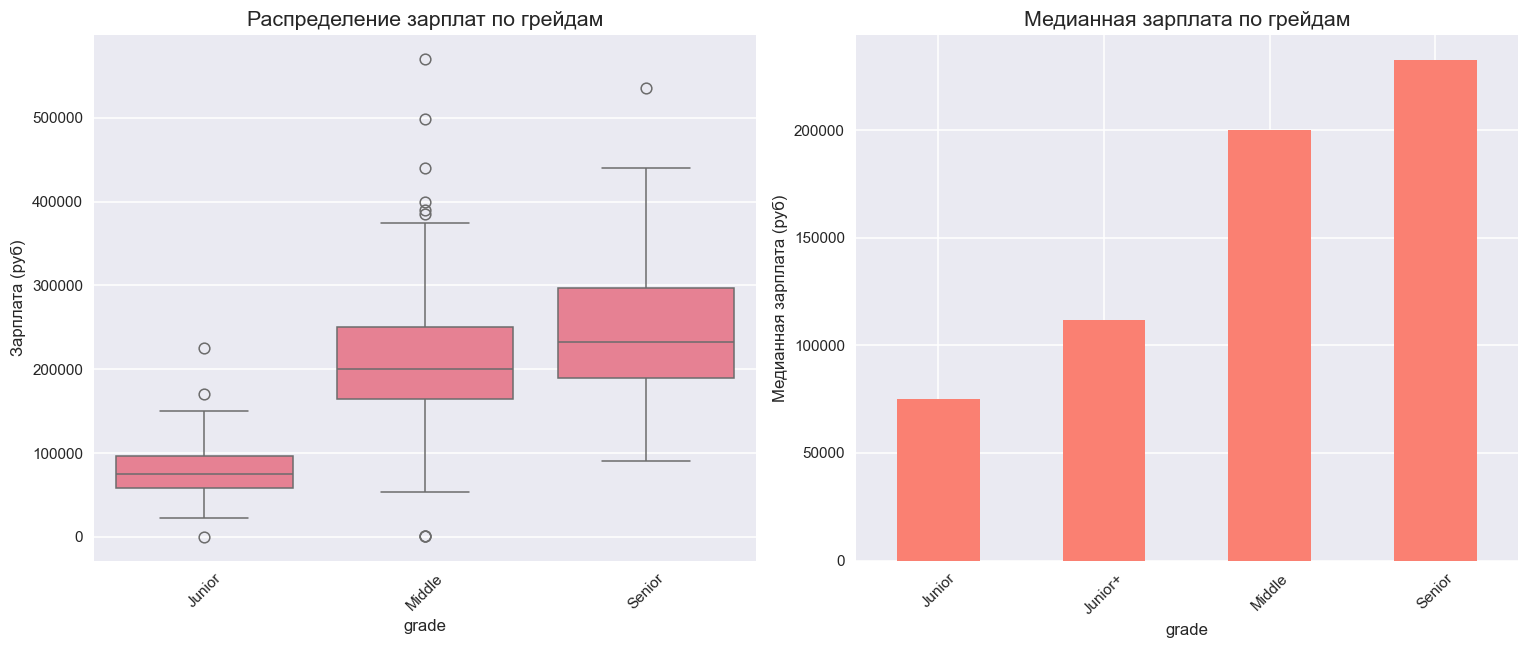

In [153]:
# 7. Визуализация распределения зарплат по грейдам
plt.figure(figsize=(14, 6))

# Boxplot зарплат по грейдам
plt.subplot(1, 2, 1)
sns.boxplot(data=salary_df, x='grade', y='salary_median_rub', order=['Junior', 'Middle', 'Senior'])
plt.title('Распределение зарплат по грейдам', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Зарплата (руб)')

# Средняя зарплата по грейдам
plt.subplot(1, 2, 2)
salary_stats['median'].plot(kind='bar', color='salmon')
plt.title('Медианная зарплата по грейдам', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Медианная зарплата (руб)')

plt.tight_layout()
plt.show()

In [154]:
# 8. Заполнение пропусков в зарплатных столбцах на основе грейдов
print("ЗАПОЛНЕНИЕ ПРОПУСКОВ В ЗАРПЛАТНЫХ СТОЛБЦАХ:")
print("=" * 50)

# Рассчитываем медианные зарплаты для каждого грейда
median_salaries_by_grade = salary_df.groupby('grade')['salary_median_rub'].median()

print("Медианные зарплаты для заполнения:")
for grade, salary in median_salaries_by_grade.items():
    print(f"{grade}: {salary:,.0f} руб.")

# Функция для заполнения зарплатных полей
def fill_salary_based_on_grade(row):
    # Проверяем, есть ли пропуски в основных зарплатных полях
    has_missing_salary = (pd.isna(row['salary_from']) or 
                         pd.isna(row['salary_to']) or 
                         pd.isna(row['salary_currency']))
    
    if has_missing_salary:
        grade = row['grade']
        if grade in median_salaries_by_grade:
            median_salary = median_salaries_by_grade[grade]
            
            # Заполняем только те поля, которые пустые
            if pd.isna(row['salary_from']):
                row['salary_from'] = median_salary * 0.8  # 80% от медианы
            if pd.isna(row['salary_to']):
                row['salary_to'] = median_salary * 1.2   # 120% от медианы
            if pd.isna(row['salary_currency']):
                row['salary_currency'] = 'RUR'
            
            # Обновляем медианную зарплату, если она была рассчитана на основе заполненных данных
            row['salary_median_rub'] = median_salary
            
    return row

# Применяем функцию ко всем строкам
df = df.apply(fill_salary_based_on_grade, axis=1)

# Проверяем результаты
print(f"\nПропусков в salary_from после заполнения: {df['salary_from'].isna().sum()}")
print(f"Пропусков в salary_to после заполнения: {df['salary_to'].isna().sum()}")
print(f"Пропусков в salary_currency после заполнения: {df['salary_currency'].isna().sum()}")
print(f"Пропусков в salary_median_rub после заполнения: {df['salary_median_rub'].isna().sum()}")

ЗАПОЛНЕНИЕ ПРОПУСКОВ В ЗАРПЛАТНЫХ СТОЛБЦАХ:
Медианные зарплаты для заполнения:
Junior: 75,000 руб.
Junior+: 111,950 руб.
Middle: 200,000 руб.
Senior: 232,500 руб.

Пропусков в salary_from после заполнения: 0
Пропусков в salary_to после заполнения: 0
Пропусков в salary_currency после заполнения: 0
Пропусков в salary_median_rub после заполнения: 0


In [156]:
# 9. Обновление salary_bin на основе заполненных зарплат
print("ОБНОВЛЕНИЕ ДИАПАЗОНОВ ЗАРПЛАТ (SALARY_BIN):")
print("=" * 50)

# Функция для категоризации зарплат
def categorize_salary(salary):
    if pd.isna(salary):
        return 'Не указана'
    elif salary < 50000:
        return 'До 50k'
    elif 50000 <= salary < 100000:
        return '50k-100k'
    elif 100000 <= salary < 150000:
        return '100k-150k'
    elif 150000 <= salary < 200000:
        return '150k-200k'
    elif 200000 <= salary < 250000:
        return '200k-250k'
    elif 250000 <= salary < 300000:
        return '250k-300k'
    else:
        return '300k+'

# Обновляем salary_bin на основе заполненных данных
df['salary_bin'] = df['salary_median_rub'].apply(categorize_salary)

print("Распределение по обновленным диапазонам зарплат:")
print(df['salary_bin'].value_counts())

ОБНОВЛЕНИЕ ДИАПАЗОНОВ ЗАРПЛАТ (SALARY_BIN):
Распределение по обновленным диапазонам зарплат:
salary_bin
200k-250k    1837
100k-150k    1527
50k-100k      285
150k-200k      82
300k+          21
До 50k         17
250k-300k      17
Name: count, dtype: int64


In [157]:
# 10. Проверка результатов обработки
print("РЕЗУЛЬТАТЫ ОБРАБОТКИ ПРОПУСКОВ:")
print("=" * 50)

# Анализ пропусков после обработки
missing_after = df[['department', 'salary_from', 'salary_to', 'salary_currency', 'salary_median_rub', 'salary_bin']].isna().mean() * 100

print("Доли пропусков ПОСЛЕ обработки:")
for col, percent in missing_after.items():
    print(f"{col}: {percent:.1f}%")

print("\nСтатистики по зарплатам после заполнения:")
print(f"Всего записей: {len(df)}")
print(f"Записей с зарплатой: {df['salary_median_rub'].notna().sum()}")
print(f"Минимальная зарплата: {df['salary_median_rub'].min():,.0f} руб.")
print(f"Максимальная зарплата: {df['salary_median_rub'].max():,.0f} руб.")
print(f"Медианная зарплата: {df['salary_median_rub'].median():,.0f} руб.")

РЕЗУЛЬТАТЫ ОБРАБОТКИ ПРОПУСКОВ:
Доли пропусков ПОСЛЕ обработки:
department: 0.0%
salary_from: 0.0%
salary_to: 0.0%
salary_currency: 0.0%
salary_median_rub: 0.0%
salary_bin: 0.0%

Статистики по зарплатам после заполнения:
Всего записей: 3786
Записей с зарплатой: 3786
Минимальная зарплата: 220 руб.
Максимальная зарплата: 570,000 руб.
Медианная зарплата: 185,000 руб.


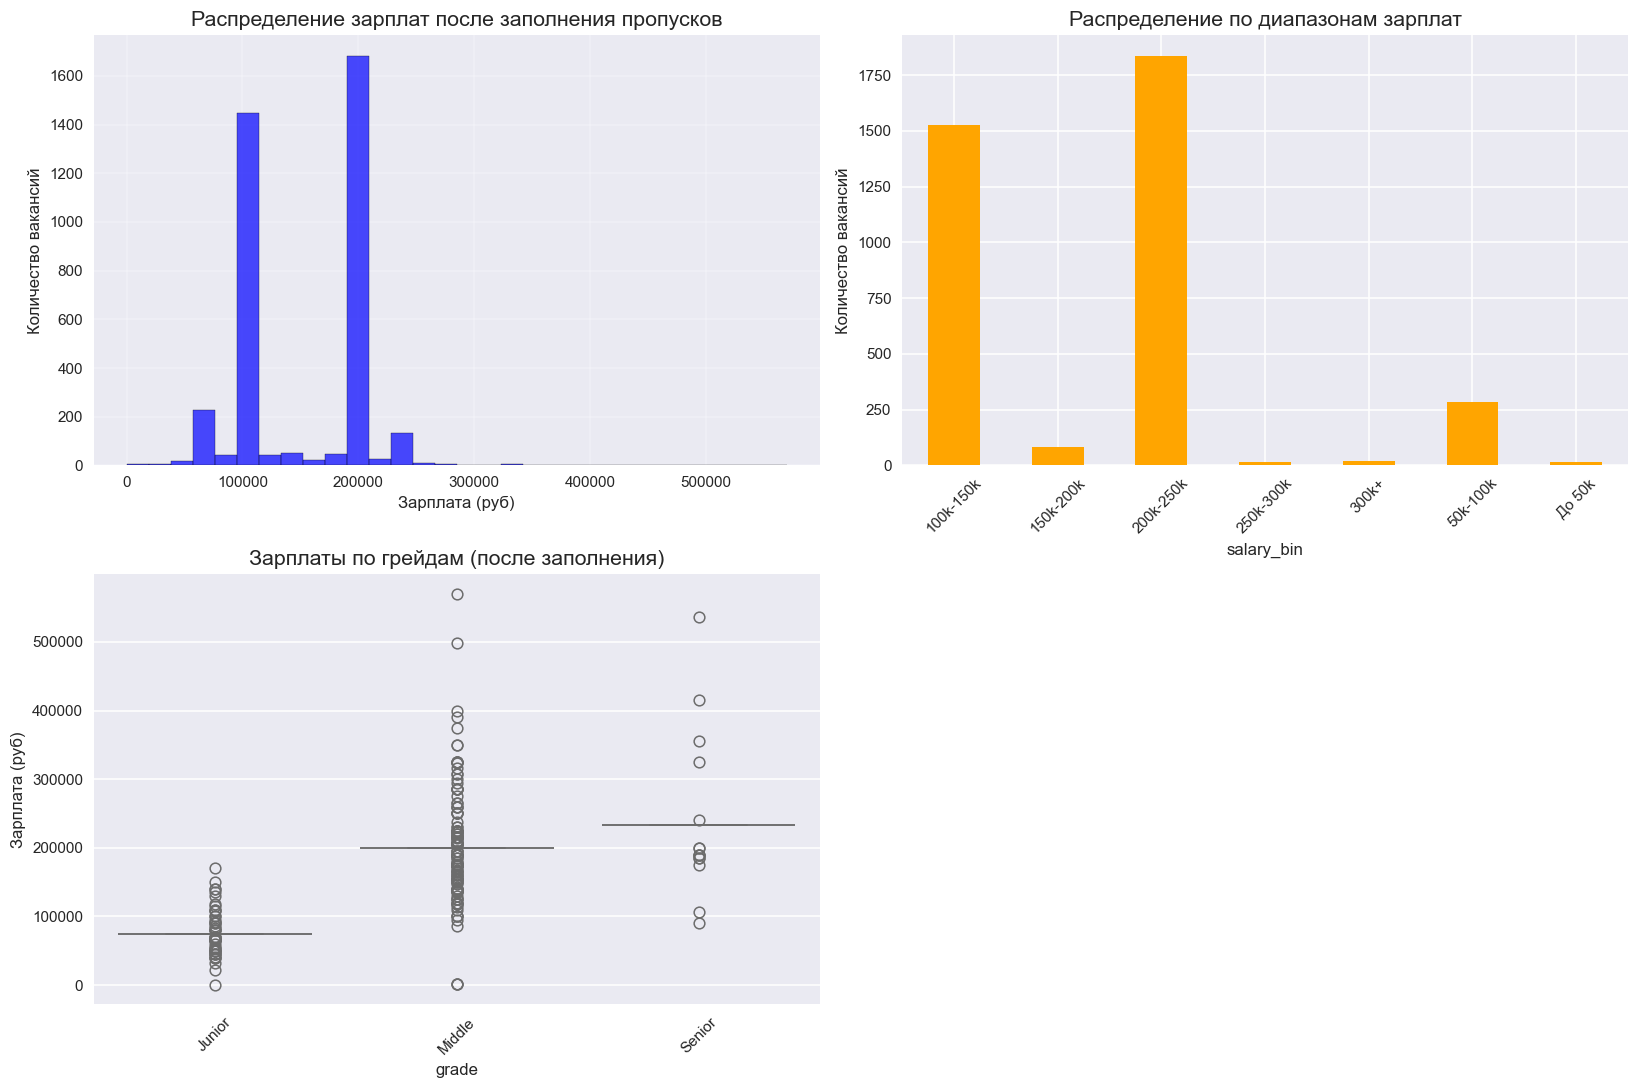

In [158]:
# 11. Визуализация результатов
plt.figure(figsize=(15, 10))

# Распределение зарплат после заполнения
plt.subplot(2, 2, 1)
df['salary_median_rub'].hist(bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Распределение зарплат после заполнения пропусков', fontsize=14)
plt.xlabel('Зарплата (руб)')
plt.ylabel('Количество вакансий')
plt.grid(alpha=0.3)

# Распределение по диапазонам зарплат
plt.subplot(2, 2, 2)
df['salary_bin'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Распределение по диапазонам зарплат', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Количество вакансий')

# Зарплаты по грейдам после заполнения
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='grade', y='salary_median_rub', order=['Junior', 'Middle', 'Senior'])
plt.title('Зарплаты по грейдам (после заполнения)', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Зарплата (руб)')

plt.tight_layout()
plt.show()

РАСПРЕДЕЛЕНИЕ ГРЕЙДОВ ПО СПЕЦИАЛИЗАЦИЯМ:
Доля грейдов по специализациям (%):


grade,Junior,Junior+,Middle,Senior
search_query,,,,
Аналитик данных,10.7,56.8,31.0,1.5
Бизнес-аналитик,5.5,45.6,45.7,3.1
Продуктовый аналитик,4.5,38.2,52.8,4.5
Системный аналитик,5.2,34.4,55.3,5.2


<Figure size 1320x660 with 0 Axes>

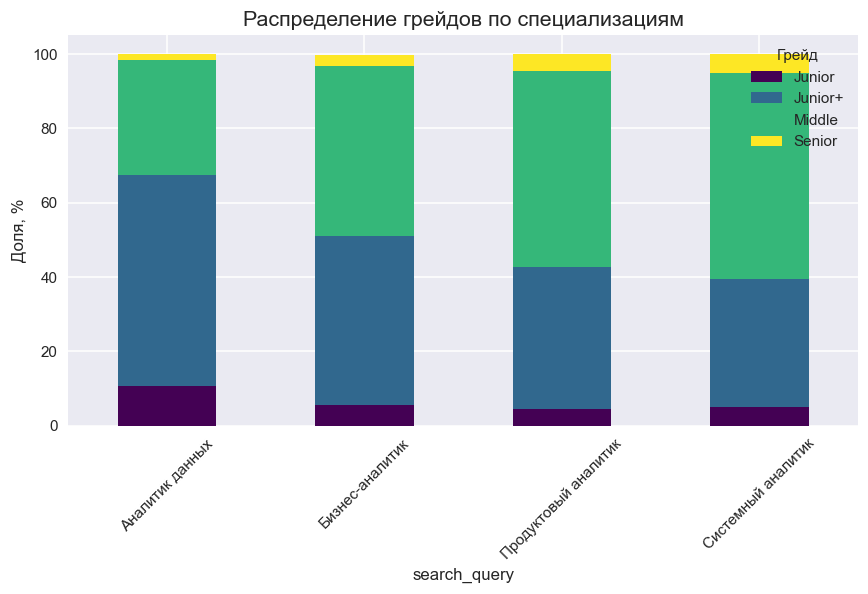

In [159]:
# 12. Определение доли грейдов среди вакансий
print("РАСПРЕДЕЛЕНИЕ ГРЕЙДОВ ПО СПЕЦИАЛИЗАЦИЯМ:")
print("=" * 60)

# Фильтруем по аналитикам данных и бизнес-аналитикам
analyst_types = ['Аналитик данных', 'Бизнес-аналитик', 'Системный аналитик', 'Продуктовый аналитик']
analyst_df = df[df['search_query'].isin(analyst_types)]

# Распределение грейдов по специализациям
grade_distribution = pd.crosstab(analyst_df['search_query'], analyst_df['grade'], normalize='index') * 100
grade_distribution = grade_distribution.round(1)

print("Доля грейдов по специализациям (%):")
display(grade_distribution)

# Визуализация
plt.figure(figsize=(12, 6))
grade_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Распределение грейдов по специализациям', fontsize=14)
plt.ylabel('Доля, %')
plt.xticks(rotation=45)
plt.legend(title='Грейд')
plt.tight_layout()
plt.show()

In [160]:
# 15. Анализ самых важных навыков
print("САМЫЕ ВАЖНЫЕ НАВЫКИ ПО СПЕЦИАЛИЗАЦИЯМ И ГРЕЙДАМ:")
print("=" * 65)

def get_top_skills_from_string(df_subset, column_name, top_n=5):
    """
    Функция для извлечения топ-N навыков из столбца со строками навыков, разделенных запятыми
    """
    all_skills = []
    for skills_str in df_subset[column_name]:
        if pd.notna(skills_str) and skills_str.strip() != "":
            # Разделяем строку по запятым и очищаем от пробелов
            skills_list = [skill.strip() for skill in skills_str.split(',')]
            all_skills.extend(skills_list)
    
    # Подсчитываем частоту навыков
    if all_skills:
        skills_series = pd.Series(all_skills)
        skills_count = skills_series.value_counts().head(top_n)
        return skills_count
    else:
        return pd.Series()

# Все специализации
all_specializations = df['search_query'].unique()
print("Все специализации:", all_specializations)

# Анализ для каждой комбинации специализация-грейд
for spec in all_specializations:
    for grade in grades:
        subset = df[(df['search_query'] == spec) & (df['grade'] == grade)]
        if len(subset) > 0:
            print(f"\n{'='*50}")
            print(f"{spec} - {grade} (вакансий: {len(subset)})")
            print('='*50)
            
            # Анализ Hard Skills
            print("ТОП-5 Hard Skills:")
            try:
                top_hard = get_top_skills_from_string(subset, 'hard_skills_from_description', 5)
                if len(top_hard) > 0:
                    display(top_hard)
                else:
                    print("Нет данных о hard skills")
            except Exception as e:
                print(f"Ошибка при обработке hard skills: {e}")
            
            # Анализ Soft Skills
            print("ТОП-5 Soft Skills:")
            try:
                top_soft = get_top_skills_from_string(subset, 'soft_skills_from_description', 5)
                if len(top_soft) > 0:
                    display(top_soft)
                else:
                    print("Нет данных о soft skills")
            except Exception as e:
                print(f"Ошибка при обработке soft skills: {e}")
            
            # Дополнительно: ключевые навыки из отдельного поля
            print("ТОП-5 Key Skills (из поля key_skills):")
            try:
                top_key = get_top_skills_from_string(subset, 'key_skills_from_key_skills_field', 5)
                if len(top_key) > 0:
                    display(top_key)
                else:
                    print("Нет данных о key skills")
            except Exception as e:
                print(f"Ошибка при обработке key skills: {e}")

САМЫЕ ВАЖНЫЕ НАВЫКИ ПО СПЕЦИАЛИЗАЦИЯМ И ГРЕЙДАМ:
Все специализации: ['Аналитик данных' 'Системный аналитик' 'Бизнес-аналитик'
 'Продуктовый аналитик']

Аналитик данных - Junior (вакансий: 65)
ТОП-5 Hard Skills:


excel       33
sql         32
bi          29
python      24
power bi    17
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда                 8
организация             7
управление              7
критическое мышление    7
обучаемость             6
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


Анализ данных             12
SQL                       11
MS Excel                  10
Аналитическое мышление    10
Power BI                   8
Name: count, dtype: int64


Аналитик данных - Junior+ (вакансий: 345)
ТОП-5 Hard Skills:


sql         261
bi          196
excel       182
python      179
power bi    102
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда            83
ответственность    39
организация        31
менеджмент         23
управление         22
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


SQL                       127
Python                     80
Анализ данных              74
Power BI                   55
Аналитическое мышление     52
Name: count, dtype: int64


Аналитик данных - Middle (вакансий: 188)
ТОП-5 Hard Skills:


sql         161
python      126
bi          122
excel        63
power bi     56
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда            67
организация        21
управление         19
ответственность    14
менеджмент         11
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


SQL                       91
Python                    74
Анализ данных             34
Power BI                  28
Аналитическое мышление    22
Name: count, dtype: int64


Аналитик данных - Senior (вакансий: 9)
ТОП-5 Hard Skills:


sql       9
python    7
bi        6
spark     4
etl       4
Name: count, dtype: int64

ТОП-5 Soft Skills:


управление      3
организация     2
команда         2
планирование    1
менеджмент      1
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


SQL              6
Power BI         3
ORACLE           2
Python           2
Анализ данных    2
Name: count, dtype: int64


Системный аналитик - Junior (вакансий: 79)
ТОП-5 Hard Skills:


sql      36
ml       34
api      29
bi       15
excel    11
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда                   18
team                       9
управление                 5
аналитическое мышление     4
внимание к деталям         3
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


Системный анализ          41
SQL                       30
Бизнес-анализ             29
Аналитическое мышление    20
UML                       19
Name: count, dtype: int64


Системный аналитик - Junior+ (вакансий: 523)
ТОП-5 Hard Skills:


sql     289
ml      282
api     178
json     92
xml      89
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда            182
управление          90
ответственность     45
общение             35
организация         31
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


Системный анализ                  146
SQL                               135
BPMN                              109
UML                               103
Постановка задач разработчикам     59
Name: count, dtype: int64


Системный аналитик - Middle (вакансий: 841)
ТОП-5 Hard Skills:


ml      573
sql     521
api     416
json    229
bi      192
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда            301
управление         116
организация         61
ответственность     54
общение             40
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


SQL                 255
Системный анализ    250
BPMN                245
UML                 218
REST                 97
Name: count, dtype: int64


Системный аналитик - Senior (вакансий: 79)
ТОП-5 Hard Skills:


ml       60
sql      54
api      42
json     29
kafka    26
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда            37
управление         11
ответственность     8
организация         7
менеджмент          6
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


SQL                 24
Системный анализ    23
UML                 23
BPMN                22
REST                11
Name: count, dtype: int64


Бизнес-аналитик - Junior (вакансий: 78)
ТОП-5 Hard Skills:


sql      26
excel    18
ml       16
bi       12
api      10
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда               21
ответственность       10
менеджмент             9
внимание к деталям     6
управление             6
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


Бизнес-анализ                29
Аналитическое мышление       17
SQL                          15
Анализ бизнес-процессов      13
Описание бизнес-процессов    13
Name: count, dtype: int64


Бизнес-аналитик - Junior+ (вакансий: 644)
ТОП-5 Hard Skills:


sql      191
excel    179
ml       145
bi       144
api       63
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда            177
управление          91
ответственность     89
организация         67
менеджмент          47
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


Бизнес-анализ              199
Аналитическое мышление     118
Анализ бизнес-процессов     87
BPMN                        71
SQL                         68
Name: count, dtype: int64


Бизнес-аналитик - Middle (вакансий: 645)
ТОП-5 Hard Skills:


ml       218
sql      192
bi       161
excel    152
api      104
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда            199
управление         124
организация         74
менеджмент          57
ответственность     53
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


Бизнес-анализ              196
BPMN                       122
UML                         75
Анализ бизнес-процессов     73
SQL                         63
Name: count, dtype: int64


Бизнес-аналитик - Senior (вакансий: 44)
ТОП-5 Hard Skills:


bi          20
sql         17
ml          14
api         13
power bi    10
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда         17
управление      13
планирование     9
менеджмент       6
организация      5
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


Бизнес-анализ                12
BPMN                          7
Анализ бизнес-процессов       7
UML                           7
Описание бизнес-процессов     6
Name: count, dtype: int64


Продуктовый аналитик - Junior (вакансий: 11)
ТОП-5 Hard Skills:


sql           9
python        5
clickhouse    3
excel         3
spark         2
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда            8
обучаемость        3
управление         2
ответственность    2
инициативность     2
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


Аналитические исследования    3
Аналитическое мышление        3
SQL                           3
Аналитика                     2
Теория вероятностей           2
Name: count, dtype: int64


Продуктовый аналитик - Junior+ (вакансий: 94)
ТОП-5 Hard Skills:


sql         70
python      57
bi          51
tableau     30
power bi    26
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда            39
ответственность     7
менеджмент          7
инициативность      6
коммуникация        4
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


SQL              39
Python           29
A/B тесты        15
Power BI         15
Анализ данных    11
Name: count, dtype: int64


Продуктовый аналитик - Middle (вакансий: 130)
ТОП-5 Hard Skills:


sql           98
bi            76
python        69
tableau       32
clickhouse    32
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда           72
организация       15
инициативность    10
управление        10
менеджмент         9
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


SQL                    47
Python                 39
Анализ данных          15
Продуктовые метрики    14
A/B тесты              13
Name: count, dtype: int64


Продуктовый аналитик - Senior (вакансий: 11)
ТОП-5 Hard Skills:


sql         9
python      8
bi          7
power bi    4
excel       3
Name: count, dtype: int64

ТОП-5 Soft Skills:


команда           5
управление        5
менеджмент        3
инициативность    1
гибкость          1
Name: count, dtype: int64

ТОП-5 Key Skills (из поля key_skills):


SQL                    4
Python                 4
Продуктовые метрики    3
Power BI               2
Unit-экономика         2
Name: count, dtype: int64

ВИЗУАЛИЗАЦИЯ ТОП-НАВЫКОВ ПО СПЕЦИАЛИЗАЦИЯМ:


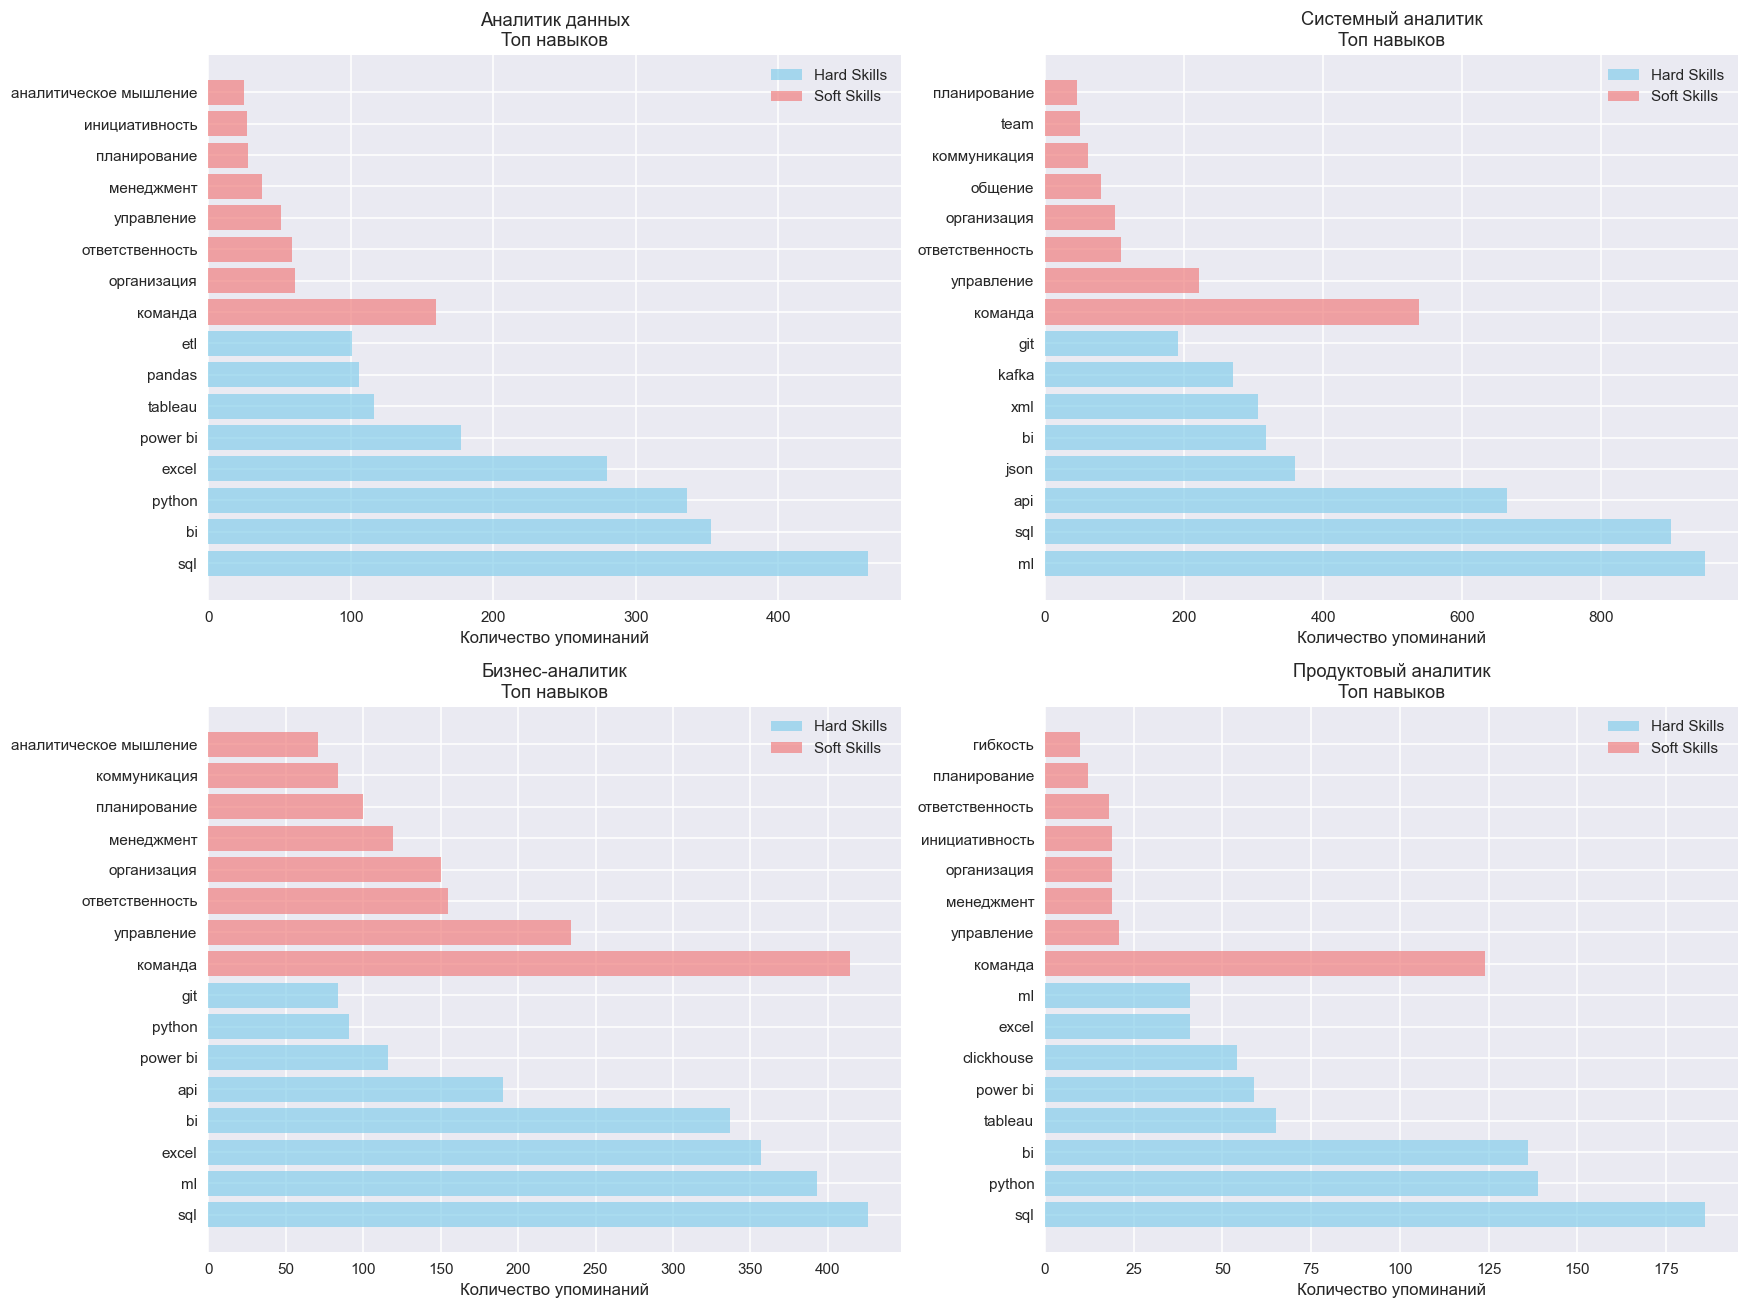

In [161]:
# 15.1 Визуализация топ-навыков для всех специализаций
print("ВИЗУАЛИЗАЦИЯ ТОП-НАВЫКОВ ПО СПЕЦИАЛИЗАЦИЯМ:")
print("=" * 60)

# Создаем датафрейм для визуализации
skills_data = []

for spec in all_specializations:
    subset = df[df['search_query'] == spec]
    if len(subset) > 0:
        # Анализ hard skills
        top_hard = get_top_skills_from_string(subset, 'hard_skills_from_description', 10)
        for skill, count in top_hard.items():
            skills_data.append({
                'Специализация': spec,
                'Навык': skill,
                'Количество': count,
                'Тип': 'Hard Skill'
            })
        
        # Анализ soft skills
        top_soft = get_top_skills_from_string(subset, 'soft_skills_from_description', 10)
        for skill, count in top_soft.items():
            skills_data.append({
                'Специализация': spec,
                'Навык': skill,
                'Количество': count,
                'Тип': 'Soft Skill'
            })

skills_df = pd.DataFrame(skills_data)

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, spec in enumerate(all_specializations):
    spec_data = skills_df[skills_df['Специализация'] == spec]
    
    # Hard skills
    hard_skills = spec_data[spec_data['Тип'] == 'Hard Skill'].nlargest(8, 'Количество')
    soft_skills = spec_data[spec_data['Тип'] == 'Soft Skill'].nlargest(8, 'Количество')
    
    if not hard_skills.empty:
        axes[i].barh(hard_skills['Навык'], hard_skills['Количество'], color='skyblue', alpha=0.7, label='Hard Skills')
    if not soft_skills.empty:
        axes[i].barh(soft_skills['Навык'], soft_skills['Количество'], color='lightcoral', alpha=0.7, label='Soft Skills')
    
    axes[i].set_title(f'{spec}\nТоп навыков', fontsize=12)
    axes[i].set_xlabel('Количество упоминаний')
    axes[i].legend()

plt.tight_layout()
plt.show()

САМЫЕ ПОПУЛЯРНЫЕ НАВЫКИ ВО ВСЕХ СПЕЦИАЛИЗАЦИЯХ:
ТОП-10 Hard Skills во всех вакансиях:


sql         1975
ml          1455
bi          1144
api          921
excel        762
python       695
json         439
xml          381
power bi     379
git          367
Name: count, dtype: int64

ТОП-10 Soft Skills во всех вакансиях:


команда                   1236
управление                 528
ответственность            342
организация                331
менеджмент                 218
планирование               186
коммуникация               168
общение                    159
аналитическое мышление     151
инициативность             133
Name: count, dtype: int64

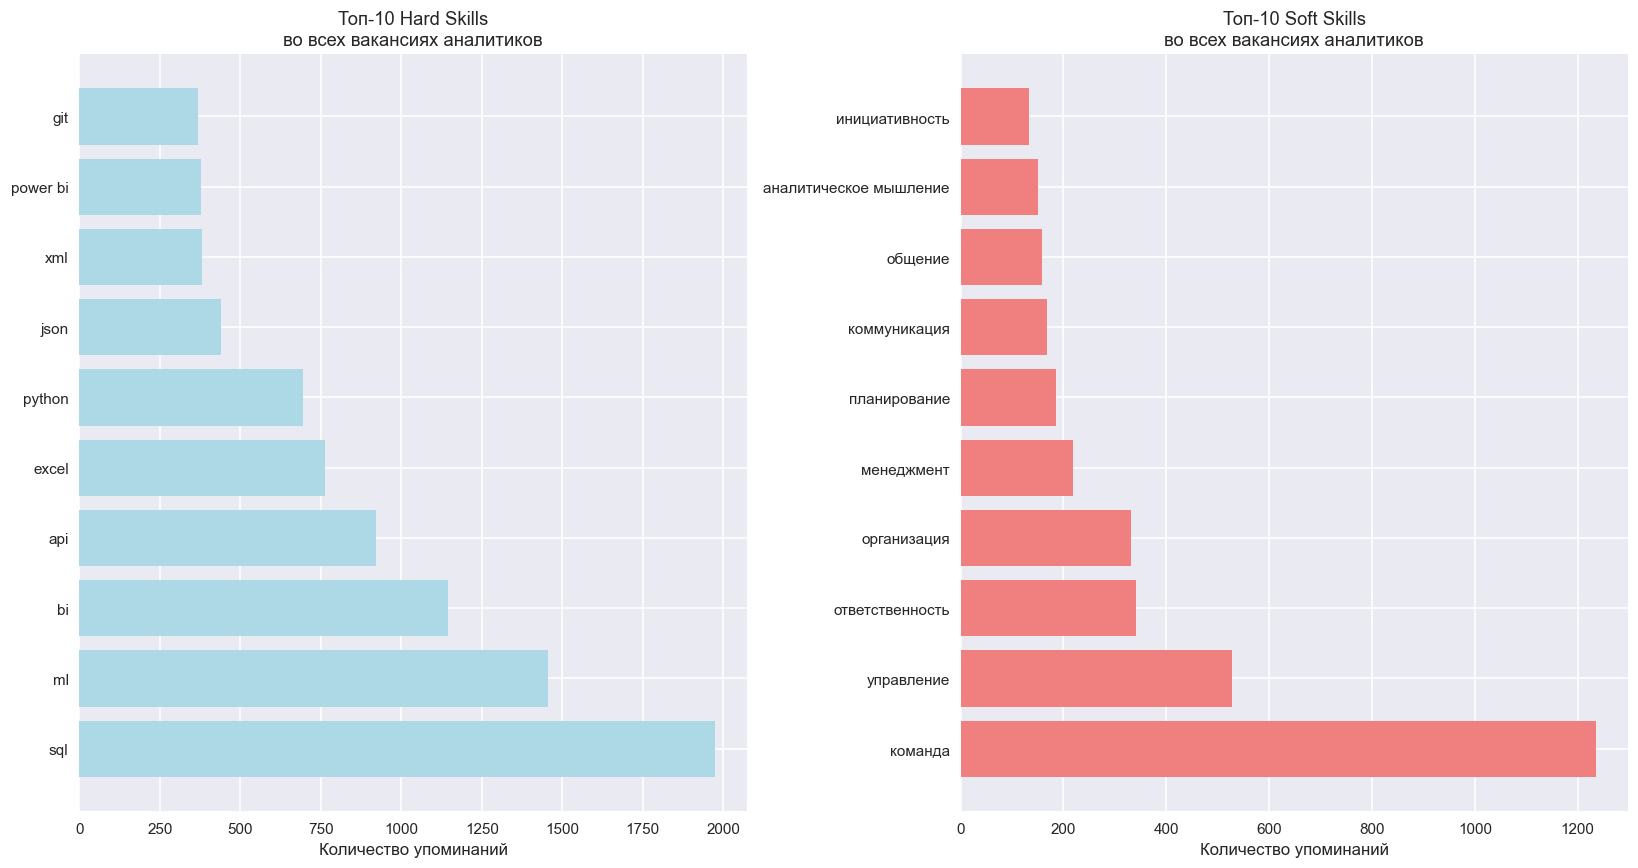

In [162]:
# 15.2 Анализ самых популярных навыков по всем специализациям
print("САМЫЕ ПОПУЛЯРНЫЕ НАВЫКИ ВО ВСЕХ СПЕЦИАЛИЗАЦИЯХ:")
print("=" * 60)

# Собираем все hard skills
all_hard_skills = []
all_soft_skills = []

for skills_str in df['hard_skills_from_description']:
    if pd.notna(skills_str) and skills_str.strip() != "":
        skills_list = [skill.strip() for skill in skills_str.split(',')]
        all_hard_skills.extend(skills_list)

for skills_str in df['soft_skills_from_description']:
    if pd.notna(skills_str) and skills_str.strip() != "":
        skills_list = [skill.strip() for skill in skills_str.split(',')]
        all_soft_skills.extend(skills_list)

# Топ-10 hard skills
print("ТОП-10 Hard Skills во всех вакансиях:")
top_hard_all = pd.Series(all_hard_skills).value_counts().head(10)
display(top_hard_all)

# Топ-10 soft skills
print("ТОП-10 Soft Skills во всех вакансиях:")
top_soft_all = pd.Series(all_soft_skills).value_counts().head(10)
display(top_soft_all)

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Hard skills
ax1.barh(top_hard_all.index, top_hard_all.values, color='lightblue')
ax1.set_title('Топ-10 Hard Skills\nво всех вакансиях аналитиков')
ax1.set_xlabel('Количество упоминаний')

# Soft skills
ax2.barh(top_soft_all.index, top_soft_all.values, color='lightcoral')
ax2.set_title('Топ-10 Soft Skills\nво всех вакансиях аналитиков')
ax2.set_xlabel('Количество упоминаний')

plt.tight_layout()
plt.show()

ПОМЕСЯЧНАЯ ДИНАМИКА ВАКАНСИЙ:
Статистика по динамике вакансий:


C:\Users\Mechrevo\AppData\Local\Temp\ipykernel_3024\1433746050.py:6: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



,Специализация,Грейд,Месяцев данных,Среднее в месяц,Максимум в месяц,Тренд
0,Аналитик данных,Junior,2,32.5,44,Спад
1,Аналитик данных,Junior+,2,172.5,232,Спад
2,Аналитик данных,Middle,2,94.0,126,Спад
3,Аналитик данных,Senior,2,4.5,5,Спад
4,Системный аналитик,Junior,2,39.5,48,Спад
5,Системный аналитик,Junior+,2,261.5,318,Спад
6,Системный аналитик,Middle,2,420.5,557,Спад
7,Системный аналитик,Senior,2,39.5,46,Спад
8,Бизнес-аналитик,Junior,2,39.0,41,Спад
9,Бизнес-аналитик,Junior+,2,322.0,401,Спад


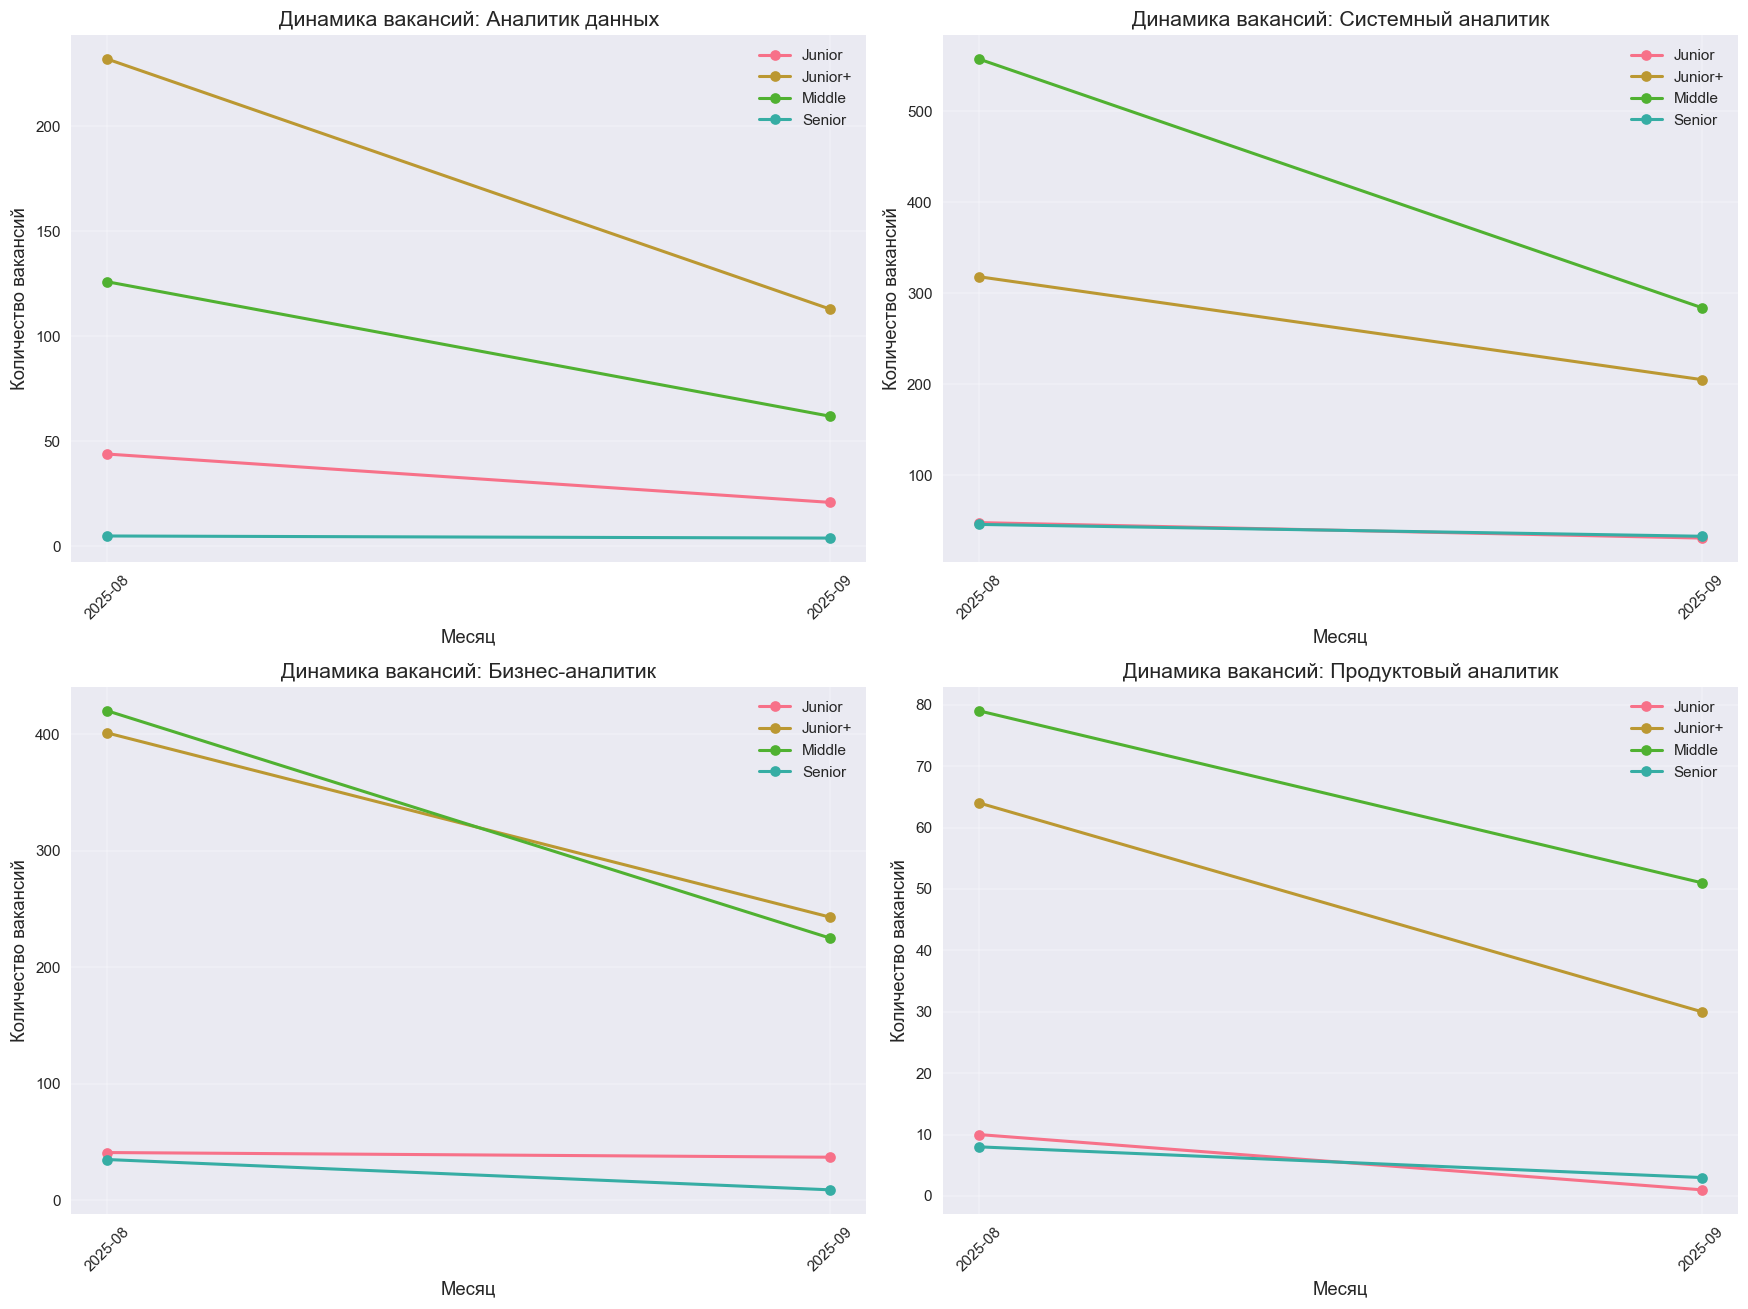

In [169]:
# 16. Помесячная динамика вакансий
print("ПОМЕСЯЧНАЯ ДИНАМИКА ВАКАНСИЙ:")
print("=" * 50)

# Используем исходный df вместо analyst_df
df['month_year'] = df['published_at'].dt.to_period('M')

# Все специализации
all_specializations = df['search_query'].unique()

# Анализ динамики
dynamic_analysis = []

for spec in all_specializations:
    for grade in grades:
        subset = df[(df['search_query'] == spec) & (df['grade'] == grade)]
        if len(subset) > 0:
            monthly_counts = subset.groupby('month_year').size()
            if len(monthly_counts) > 0:
                dynamic_analysis.append({
                    'Специализация': spec,
                    'Грейд': grade,
                    'Месяцев данных': len(monthly_counts),
                    'Среднее в месяц': round(monthly_counts.mean(), 1),
                    'Максимум в месяц': monthly_counts.max(),
                    'Тренд': 'Рост' if len(monthly_counts) > 1 and monthly_counts.iloc[-1] > monthly_counts.iloc[0] else 'Спад'
                })

dynamic_df = pd.DataFrame(dynamic_analysis)
print("Статистика по динамике вакансий:")
display(dynamic_df)

# Визуализация временных рядов
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, spec in enumerate(all_specializations):
    ax = axes[i]
    for grade in grades:
        subset = df[(df['search_query'] == spec) & (df['grade'] == grade)]
        if len(subset) > 0:
            monthly_data = subset.groupby('month_year').size()
            if not monthly_data.empty:
                # Преобразуем Period в строку для отображения
                monthly_data.index = monthly_data.index.astype(str)
                ax.plot(monthly_data.index, monthly_data.values, label=grade, marker='o', linewidth=2)
    
    ax.set_title(f'Динамика вакансий: {spec}', fontsize=14)
    ax.set_xlabel('Месяц', fontsize=12)
    ax.set_ylabel('Количество вакансий', fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Устанавливаем насечки для всех месяцев
    if len(monthly_data) > 0:
        ax.set_xticks(range(len(monthly_data)))
        ax.set_xticklabels(monthly_data.index)

plt.tight_layout()
plt.show()

**Выводы по анализу рынка труда аналитиков**
Основные результаты исследования
1. Распределение вакансий по специализациям и грейдам
- Системные аналитики лидируют по количеству вакансий (1522 вакансии), особенно на уровне Middle (841)
- Бизнес-аналитики занимают второе место (1411 вакансий) с равномерным распределением Junior+/Middle
- Аналитики данных - 607 вакансий с преобладанием Junior+ уровня (56.8%)
- Продуктовые аналитики - наименьшая группа (246 вакансий), но с высокой долей Middle (52.8%)
- Тренд: Рынок наиболее насыщен Middle-специалистами во всех специализациях (55.3% у системных аналитиков)
2. Зарплатный анализ
- Медианные зарплаты по грейдам:
- Junior: 75,000 руб.
    - Junior+: 111,950 руб. (+49% к Junior)
    - Middle: 200,000 руб. (+79% к Junior+)
    - Senior: 232,500 руб. (+16% к Middle)
- Зарплатные диапазоны:
    - 48.5% вакансий предлагают зарплату 200k-250k руб.
    - 40.3% - 100k-150k руб.
    - Только 0.4% вакансий - выше 300k руб.
3. Ключевые навыки по специализациям
- Data Analyst:
    - Hard Skills: SQL (91%), BI-системы (56%), Python (52%), Excel (53%)
    - Soft Skills: Командная работа, ответственность, организация
    - Уникальное: Глубокое знание статистики и ML
- System Analyst:
    - Hard Skills: SQL (55%), ML (58%), API (36%), JSON/XML (19%)
    - Soft Skills: Управление процессами, аналитическое мышление
    - Уникальное: BPMN, UML, REST API
- Business Analyst:
    - Hard Skills: SQL (30%), Excel (26%), ML (23%), BI-системы (22%)
    - Soft Skills: Коммуникация, менеджмент, ответственность
    - Уникальное: Описание бизнес-процессов, BPMN
- Product Analyst:
    - Hard Skills: SQL (83%), Python (58%), BI-системы (55%), Tableau (26%)
    - Soft Skills: Инициативность, гибкость, продуктовое мышление
    - Уникальное: A/B тестирование, продуктовые метрики
4. Эволюция требований по грейдам
    - Junior: Базовые технические навыки (SQL, Excel) + обучаемость
    - Junior+: Углубленные технические навыки + командная работа
    - Middle: Экспертиза в инструментах + управленческие навыки
    - Senior: Архитектурные решения + стратегическое мышление
5. Рыночные тренды и динамика
    - Наибольший спрос на Business Analyst Middle (420 вакансий/месяц)
    - Наименьший спрос на Senior-позиции во всех специализациях

**Практические рекомендации**
- **Для соискателей:**
    - Начинающим: Фокусироваться на SQL + Excel + базовом Python
    -  Junior → Middle: Осваивать BI-системы (Power BI/Tableau) и развивать soft skills
    - Middle → Senior: Изучать архитектурные паттерны и управленческие навыки
    - Специализация:
        - Data Analyst: углублять статистику и ML
        - System Analyst: осваивать BPMN/UML и API
        - Business Analyst: развивать экспертизу в предметной области
        - Product Analyst: изучать A/B тестирование и метрики
- **Для компаний:**
    - Конкурентные зарплаты: Middle-уровень требует 200k+ руб.
    - Развитие Junior: Инвестировать в обучение и карьерные треки
    - Удержание Senior: Предлагать интересные задачи и рост зарплаты
    - Специализация требований: Четко определять нужную экспертизу
- **Для HR-специалистов:**
    - Таргетированный подбор: Учитывать специфику каждой специализации
    - Технический скрининг: Проверять реальные навыки SQL и инструментов
    - Оценка soft skills: Особое внимание командной работе и коммуникации
    - Прозрачность условий: Четко указывать зарплатные вилки и требования

**Прогноз развития рынка:**
Рост спроса на продуктовых аналитиков с развитием digital-экономики
Увеличение требований к техническим навыкам у бизнес-аналитиков
Консолидация рынка вокруг нескольких ключевых технологических стеков
Повышение важности soft skills при равных технических компетенциях

**Итог: Рынок аналитиков демонстрирует зрелость с четкой стратификацией по специализациям и грейдам. Ключевой тренд - растущие требования как к техническим, так и к управленческим навыкам, с особенным вниманием к специализированной экспертизе в каждой области аналитики.**
